# Environment setup

### Library preparation

In [7]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
import pandas as pd
import pandas as pd
pd.set_eng_float_format(accuracy=1, use_eng_prefix=True)

import numpy as np

import os

import matplotlib.pyplot as plt


from qcodes.instrument.parameter import Parameter


from si_prefix import si_format as SI

In [9]:
import sys 
sys.path.append('..\..\_jjtools')

# from Exps import *

from JJ_data_processing import read_opj_data, pbi, bpbi, show_df, update_df

from JJformulas import *
from meas_util import *

from JJmeasurement import *

### Database ini

In [10]:
SAMPLE = 'D055BCN5'

jj = JJmeas(sample = SAMPLE)

jj.db_connect()

# Sample discription and runid matrix

# Import from origin

In [5]:
Vmock = Parameter(name = 'Voltage', label = 'Voltage', unit = 'V')
Imock = Parameter(name = 'Current', label = 'Current', unit = 'A')

<IPython.core.display.Javascript object>


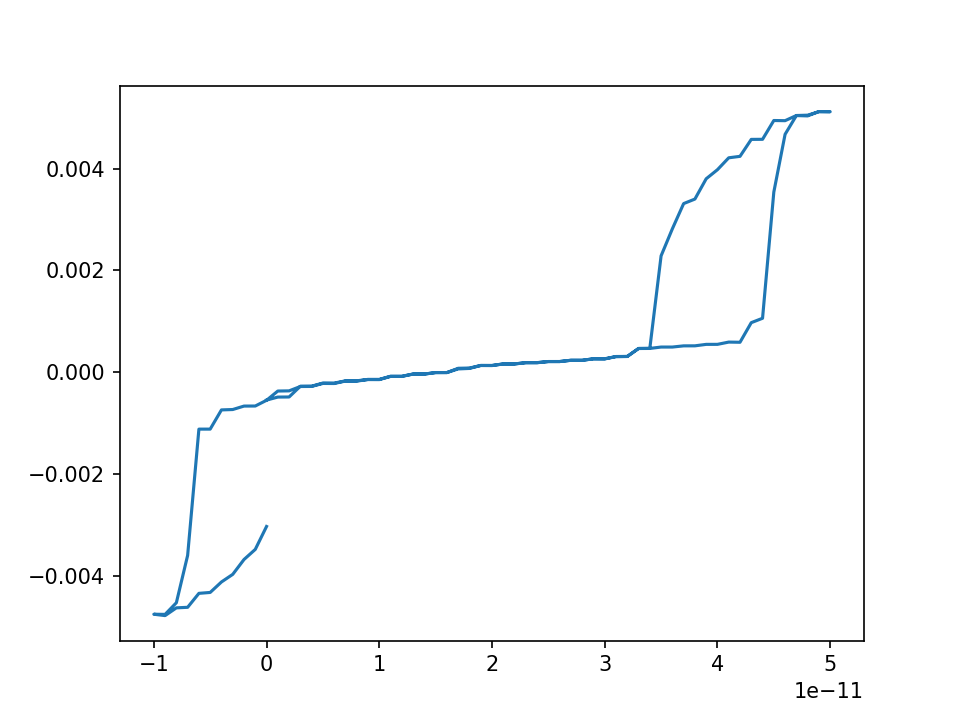

In [6]:
x, y = read_opj_data(cols = (5,6), preprint = True)

In [11]:
runid = jj.mock_meas( x = (Imock, x), y = (Vmock, y) , label = 'IVC coarse')

Upgrading database; v0 -> v1: : 0it [00:00, ?it/s]
Upgrading database; v1 -> v2: 100%|██████████████████████████████████████████████████████| 1/1 [00:00<00:00, 62.21it/s]
Upgrading database; v2 -> v3: : 0it [00:00, ?it/s]
Upgrading database; v3 -> v4: : 0it [00:00, ?it/s]
Upgrading database; v4 -> v5: 100%|██████████████████████████████████████████████████████| 1/1 [00:00<00:00, 74.95it/s]
Upgrading database; v5 -> v6: : 0it [00:00, ?it/s]
Upgrading database; v7 -> v8: 100%|██████████████████████████████████████████████████████| 1/1 [00:00<00:00, 65.14it/s]
Starting experimental run with id: 1


# Report

## Overview IVC

In [11]:
jj.pbi(1, interactive = True)

NameError: No run matching the supplied information found.

In [7]:
Vg = np.nan
Rn_tot = 403e3

## IVC fine scan

In [12]:
pbi(1, interactive = True)

NameError: No run matching the supplied information found.

In [8]:
Ro_tot = 19.21e6
Isw = 42e-12
N  = 20
Vo_tot = 589e-6

# Datatable update

In [9]:
ft = pd.read_excel("..\chain table.xlsx", index_col = 0)
show_df(ft, 
         find = SAMPLE
         )

,Ajj,Ec,Ej,Iab,Isw,N,Npar,Rn,Rn_tot,Ro,RoFF,Ro_tot,Vo_tot,dsgn,status,wp


In [10]:
ft = pd.read_excel("..\chain table.xlsx", index_col = 0)
ft = update_df(ft, SAMPLE, 
         
              {'Rn_tot'  : Rn_tot,
               'Ro_tot'  : Ro_tot,
               'Isw'     : Isw,
               'N'       : N,
               'Vo_tot'  : Vo_tot,
               'Npar'    : 2,
               'dsgn'    : 'Fin',
               'Ajj'     : 40e-15,
               'status'  : 'measd_lv'
             })

show_df(ft, 
       find = SAMPLE)

,Ajj,Ec,Ej,Iab,Isw,N,Npar,Rn,Rn_tot,Ro,RoFF,Ro_tot,Vo_tot,dsgn,status,wp
D055BCN5,40.0f,185.9m,336.3m,14.1n,42.0p,20.0,2.0,20.2k,403.0k,960.5k,NaN,19.2M,589.0u,Fin,measd_lv,707.2m


In [11]:
ft.to_excel("..\chain table.xlsx")
ft = pd.read_excel("..\chain table.xlsx", index_col = 0)
show_df(ft, 
         find = SAMPLE
         )

,Ajj,Ec,Ej,Iab,Isw,N,Npar,Rn,Rn_tot,Ro,RoFF,Ro_tot,Vo_tot,dsgn,status,wp
D055BCN5,40.0f,185.9m,336.3m,14.1n,42.0p,20,2,20.2k,403.0k,960.5k,NaN,19.2M,589.0u,Fin,measd_lv,707.2m
